# Alcohol Consumption Data Set


This dataset contains information about students. Each row corresponds to a student, with the columns providing detailed attributes:

- **School**: Student's school (binary: GP - Gabriel Pereira or MS - Mousinho da Silveira)
- **Sex**: Student's sex (binary: F - female or M - male)
- **Age**: Student's age (numeric: from 15 to 22)
- **Address**: Student's home address type (binary: U - urban or R - rural)
- **Famsize**: Family size (binary: LE3 - less or equal to 3 or GT3 - greater than 3)
- **Pstatus**: Parent's cohabitation status (binary: T - living together or A - apart)
- **Medu**: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu**: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob**: Mother's job (nominal: teacher, health care related, civil services (e.g., administrative or police), at_home or other)
- **Fjob**: Father's job (nominal: teacher, health care related, civil services (e.g., administrative or police), at_home or other)
- **Reason**: Reason to choose this school (nominal: close to home, school reputation, course preference or other)
- **Guardian**: Student's guardian (nominal: mother, father or other)
- **Traveltime**: Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **Studytime**: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **Failures**: Number of past class failures (numeric: n if 1≤n<3, else 4)
- **Schoolsup**: Extra educational support (binary: yes or no)
- **Famsup**: Family educational support (binary: yes or no)
- **Paid**: Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **Activities**: Extra-curricular activities (binary: yes or no)
- **Nursery**: Attended nursery school (binary: yes or no)
- **Higher**: Wants to take higher education (binary: yes or no)
- **Internet**: Internet access at home (binary: yes or no)
- **Romantic**: With a romantic relationship (binary: yes or no)
- **Famrel**: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **Freetime**: Free time after school (numeric: from 1 - very low to 5 - very high)
- **Goout**: Going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Health**: Current health status (numeric: from 1 - very bad to 5 - very good)
- **Absences**: Number of school absences (numeric: from 0 to 93)
- **Grades (G1, G2, G3)**: First, second, and final grades (numeric: from 0 to 20, output target)

That is all we need to know about the columns' meaning.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib_inline
from matplotlib import pyplot as plt
import plotly.express as px
%pylab inline
from pathlib import Path 

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus 

#Importing libraries for Machine Learning models
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns',500)
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pdf = pd.read_csv('/Users/shivi/Desktop/Python Final Project/student-por.csv') #Loading Portuguese Dataset
mdf = pd.read_csv('/Users/shivi/Desktop/Python Final Project/student-mat.csv') #Loading Math Dataset

In [3]:
pdf.head()   #return Portuguese dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
mdf.head()   #return Math dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
pdf.info()   #Information about the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
mdf.info()     #Information about the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
pdf.describe()  #Returns Descriptive Statistics of the Table

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
mdf.describe()    #Returns Descriptive Statistics of the Table

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
# Merge the two Dataset
student = pd.merge(pdf, mdf, how='outer', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet","guardian","traveltime","studytime","famsup","activities","higher","romantic","famrel","freetime","goout","Dalc","Walc","health","schoolsup"])
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures_x,schoolsup,famsup,paid_x,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_x,G1_x,G2_x,G3_x,failures_y,paid_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4.0,0.0,11.0,11.0,0.0,no,6.0,5.0,6.0,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2.0,9.0,11.0,11.0,0.0,no,4.0,5.0,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0.0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6.0,12.0,13.0,12.0,3.0,yes,10.0,7.0,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0.0,14.0,14.0,14.0,0.0,yes,2.0,15.0,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0.0,11.0,13.0,13.0,0.0,yes,4.0,6.0,10.0,10.0


In [10]:
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      674 non-null    object 
 1   sex         674 non-null    object 
 2   age         674 non-null    int64  
 3   address     674 non-null    object 
 4   famsize     674 non-null    object 
 5   Pstatus     674 non-null    object 
 6   Medu        674 non-null    int64  
 7   Fedu        674 non-null    int64  
 8   Mjob        674 non-null    object 
 9   Fjob        674 non-null    object 
 10  reason      674 non-null    object 
 11  guardian    674 non-null    object 
 12  traveltime  674 non-null    int64  
 13  studytime   674 non-null    int64  
 14  failures_x  649 non-null    float64
 15  schoolsup   674 non-null    object 
 16  famsup      674 non-null    object 
 17  paid_x      649 non-null    object 
 18  activities  674 non-null    object 
 19  nursery     674 non-null    o

In [11]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures_x,famrel,freetime,goout,Dalc,Walc,health,absences_x,G1_x,G2_x,G3_x,failures_y,absences_y,G1_y,G2_y,G3_y
count,674.000000,674.000000,674.000000,674.000000,674.000000,649.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,649.000000,649.000000,649.000000,649.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.808605,2.495549,2.295252,1.565282,1.930267,0.221880,3.936202,3.188427,3.178042,1.500000,2.278932,3.532641,3.659476,11.399076,11.570108,11.906009,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.264623,1.133370,1.097237,0.745096,0.824695,0.593235,0.945983,1.056410,1.165779,0.920705,1.282851,1.434960,4.640759,2.745265,2.913639,3.230656,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,3.000000,75.000000,19.000000,19.000000,20.000000


## Data Cleaning

In [12]:
#Function to Check the null values in terms of perecentage 
def null_values_check(student):
    null_values    = round((student.isnull().sum()/len(student) * 100),2).to_frame().rename(columns={0:'Null_values_percentage'})
    null_values    = pd.DataFrame(null_values)
    null_values.reset_index(inplace=True)
    return null_values.sort_values(by='Null_values_percentage',ascending=False)
null_values_check(student)

,index,Null_values_percentage
38,G3_y,41.39
37,G2_y,41.39
36,G1_y,41.39
35,absences_y,41.39
34,paid_y,41.39
33,failures_y,41.39
30,G1_x,3.71
17,paid_x,3.71
14,failures_x,3.71
29,absences_x,3.71


In [13]:
student.isnull().sum()  # no. of null values in student

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures_x     25
schoolsup       0
famsup          0
paid_x         25
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences_x     25
G1_x           25
G2_x           25
G3_x           25
failures_y    279
paid_y        279
absences_y    279
G1_y          279
G2_y          279
G3_y          279
dtype: int64

Generally, less than 5% of missing data is acceptable in a dataset

In [14]:
df = student.fillna(student.mode().iloc[0])    # Filling NA values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures_x    0
schoolsup     0
famsup        0
paid_x        0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences_x    0
G1_x          0
G2_x          0
G3_x          0
failures_y    0
paid_y        0
absences_y    0
G1_y          0
G2_y          0
G3_y          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      674 non-null    object 
 1   sex         674 non-null    object 
 2   age         674 non-null    int64  
 3   address     674 non-null    object 
 4   famsize     674 non-null    object 
 5   Pstatus     674 non-null    object 
 6   Medu        674 non-null    int64  
 7   Fedu        674 non-null    int64  
 8   Mjob        674 non-null    object 
 9   Fjob        674 non-null    object 
 10  reason      674 non-null    object 
 11  guardian    674 non-null    object 
 12  traveltime  674 non-null    int64  
 13  studytime   674 non-null    int64  
 14  failures_x  674 non-null    float64
 15  schoolsup   674 non-null    object 
 16  famsup      674 non-null    object 
 17  paid_x      674 non-null    object 
 18  activities  674 non-null    object 
 19  nursery     674 non-null    o

In [16]:
null_values_check(df)[:13]

,index,Null_values_percentage
0,school,0.0
29,absences_x,0.0
22,romantic,0.0
23,famrel,0.0
24,freetime,0.0
25,goout,0.0
26,Dalc,0.0
27,Walc,0.0
28,health,0.0
30,G1_x,0.0


In [17]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures_x,schoolsup,famsup,paid_x,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_x,G1_x,G2_x,G3_x,failures_y,paid_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4.0,0.0,11.0,11.0,0.0,no,6.0,5.0,6.0,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2.0,9.0,11.0,11.0,0.0,no,4.0,5.0,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0.0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6.0,12.0,13.0,12.0,3.0,yes,10.0,7.0,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0.0,14.0,14.0,14.0,0.0,yes,2.0,15.0,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0.0,11.0,13.0,13.0,0.0,yes,4.0,6.0,10.0,10.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      674 non-null    object 
 1   sex         674 non-null    object 
 2   age         674 non-null    int64  
 3   address     674 non-null    object 
 4   famsize     674 non-null    object 
 5   Pstatus     674 non-null    object 
 6   Medu        674 non-null    int64  
 7   Fedu        674 non-null    int64  
 8   Mjob        674 non-null    object 
 9   Fjob        674 non-null    object 
 10  reason      674 non-null    object 
 11  guardian    674 non-null    object 
 12  traveltime  674 non-null    int64  
 13  studytime   674 non-null    int64  
 14  failures_x  674 non-null    float64
 15  schoolsup   674 non-null    object 
 16  famsup      674 non-null    object 
 17  paid_x      674 non-null    object 
 18  activities  674 non-null    object 
 19  nursery     674 non-null    o

In [19]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures_x,famrel,freetime,goout,Dalc,Walc,health,absences_x,G1_x,G2_x,G3_x,failures_y,absences_y,G1_y,G2_y,G3_y
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,16.808605,2.495549,2.295252,1.565282,1.930267,0.213650,3.936202,3.188427,3.178042,1.500000,2.278932,3.532641,3.523739,11.347181,11.548961,11.872404,0.195846,3.345697,10.532641,10.004451,10.243323
std,1.264623,1.133370,1.097237,0.745096,0.824695,0.583623,0.945983,1.056410,1.165779,0.920705,1.282851,1.434960,4.606043,2.706758,2.861042,3.174711,0.592359,6.739083,2.578855,2.999501,3.511411
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.000000,0.000000,10.000000,9.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,0.000000,0.000000,10.000000,9.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.000000,4.000000,11.000000,11.000000,11.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [20]:
df[['absences_x','absences_y','G1_x','G1_y','G2_x','G2_y','failures_x','failures_y']].head()

,absences_x,absences_y,G1_x,G1_y,G2_x,G2_y,failures_x,failures_y
0,4.0,6.0,0.0,5.0,11.0,6.0,0.0,0.0
1,2.0,4.0,9.0,5.0,11.0,5.0,0.0,0.0
2,6.0,10.0,12.0,7.0,13.0,8.0,0.0,3.0
3,0.0,2.0,14.0,15.0,14.0,14.0,0.0,0.0
4,0.0,4.0,11.0,6.0,13.0,10.0,0.0,0.0


In [21]:
df['absences_x'].sum()

2375.0

In [22]:
 df['absences_y'].sum()

2255.0

In [23]:
df['school_GP'] = df['school'].apply(lambda x: 1 if x == 'GP' else 0)
df['school_MS'] = df['school'].apply(lambda x: 1 if x == 'MS' else 0)

In [24]:
df['Female'] = df['sex'].apply(lambda x: 1 if x == 'F' else 0)
df['Male'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

- Dropping 'G1_x','G1_y','G2_x','G2_y' as our baseline is Final grades "G3" 
- Keeping Filures, absences and paid for portuguese data.
- Dropping School and Sex columns as we have created Dummy variables for them.

In [25]:
df.drop(columns = ['G1_x','G1_y','G2_x','G2_y','absences_y','failures_y','paid_y','school','sex'], inplace=True)

In [26]:
dict = {'failures_x': 'failures',
        'paid_x': 'paid',
        'absences_x': 'absences',
        'G3_x' : 'G3_m',
        'G3_y': 'G3_p'
       }
df.rename(columns=dict,inplace=True)

In [27]:
df.columns

Index(['age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G3_m', 'G3_p', 'school_GP', 'school_MS',
       'Female', 'Male'],
      dtype='object')

### Family Score

In [28]:
df.columns

Index(['age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G3_m', 'G3_p', 'school_GP', 'school_MS',
       'Female', 'Male'],
      dtype='object')

In [29]:
df['AvgAlc'] =((df.Dalc) + (df.Walc))/2
df.AvgAlc.mean()

student['AvgAlc'] =((df.Dalc) + (df.Walc))/2

In [30]:
#Education mapping
education_mapping = {0: 0, 1: 0.25, 2: 0.5, 3: 0.75, 4: 1.0}

df['MeduS'] = df['Medu'].map(education_mapping)
df['FeduS'] = df['Fedu'].map(education_mapping)

In [31]:
df['famsizeS'] = df['famsize'].replace({'LE3': 0, 'GT3': 1})

#Family Relationship mapping
famrel_mapping = {0: 0, 1: 0.2, 2: 0.4, 3: 0.6, 4: 0.8, 5:1.0}

df['FamrelS'] = df['famrel'].map(famrel_mapping)
df['FamrelS']

0      0.8
1      1.0
2      0.8
3      0.6
4      0.8
      ... 
669    0.6
670    1.0
671    1.0
672    1.0
673    0.6
Name: FamrelS, Length: 674, dtype: float64

In [32]:
df['Pstatus'] = df['Pstatus'].replace({'T': 1, 'A': -1})

# Creating columns seperating "Mjob" & "Fjob"
df['Mjob_at_home'] = df['Mjob'].apply(lambda x: 1 if x == 'at_home' else 0)
df['Fjob_at_home'] = df['Fjob'].apply(lambda x: 1 if x == 'at_home' else 0)

# Creating column consising of good family score variables
df['Good_Fam_Score']= df['MeduS'] + df['FeduS'] + df['famsizeS'] + df['FamrelS'] + df['Pstatus'] + df['Mjob_at_home'] + df['Fjob_at_home']

In [33]:
df['Good_Fam_Score'].corr(df['AvgAlc'])

-0.04240888176490411

### Social Interaction Score

In [34]:
# Function for Social Interaction Score calculation
def calculate_social_interaction_score(row):
    score = 0
    # Add 1 point if romantic is 'yes'
    if row['romantic'] == 'yes':
        score += 1
    # Add points based on the freetime and goout columns
    # Starting from 0.2 for a value of 1 and incrementing by 0.2 for each point
    score += row['freetime'] * 0.2
    score += row['goout'] * 0.2
    return score

# Apply the accurate function to create the new column
df['Social_Interaction_Score'] = df.apply(calculate_social_interaction_score, axis=1)

In [35]:
df['G3_mAI'] = (df.G3_m > 12)+0.0  # Above average Scores in math
df['G3_pAI'] = (df.G3_p > 12)+0.0  # Above average Scores in portuguese

In [36]:
df.G3_mAI.mean()

0.4094955489614243

In [37]:
df.G3_pAI.mean()

0.1943620178041543

### Student Score 

In [38]:
# Calculating the Final Grades Score
df['Finalgrade_m'] = df['G3_m'] * 0.05
df['Finalgrade_p'] = df['G3_p'] * 0.05

In [39]:
# Calculating the Absences Score
absence_quartiles = df['absences'].describe()[['25%', '50%', '75%']]
def calculate_absence_score(absences):
    if absences <= absence_quartiles['25%']:
        return 0
    elif absences <= absence_quartiles['50%']:
        return -0.25
    elif absences <= absence_quartiles['75%']:
        return -0.50
    else:
        return -0.75

df['Absence_Score'] = df['absences'].apply(calculate_absence_score)

In [40]:
# Calculating the Failures Score
df['Failures_Score'] = 1 - df['failures'] * 0.25

In [41]:
# Calculating the Good Student Score
df['Good_Student_Score'] = df['Finalgrade_m']+ df['Finalgrade_p'] + df['Absence_Score'] + df['Failures_Score']
#df['Good_Student_Score'] = (df.Good_Student_Score > df.Good_Student_Score.mean() )+0.0 

In [42]:
df.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3_m,G3_p,school_GP,school_MS,Female,Male,AvgAlc,MeduS,FeduS,famsizeS,FamrelS,Mjob_at_home,Fjob_at_home,Good_Fam_Score,Social_Interaction_Score,G3_mAI,G3_pAI,Finalgrade_m,Finalgrade_p,Absence_Score,Failures_Score,Good_Student_Score
0,18,U,GT3,-1,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4.0,11.0,6.0,1,0,1,0,1.0,1.00,1.00,1,0.8,1,0,3.8,1.4,0.0,0.0,0.55,0.30,-0.50,1.0,1.35
1,17,U,GT3,1,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2.0,11.0,6.0,1,0,1,0,1.0,0.25,0.25,1,1.0,1,0,4.5,1.2,0.0,0.0,0.55,0.30,-0.25,1.0,1.60
2,15,U,LE3,1,1,1,at_home,other,other,mother,1,2,0.0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6.0,12.0,10.0,1,0,1,0,2.5,0.25,0.25,0,0.8,1,0,3.3,1.0,0.0,0.0,0.60,0.50,-0.50,1.0,1.60
3,15,U,GT3,1,4,2,health,services,home,mother,1,3,0.0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0.0,14.0,15.0,1,0,1,0,1.0,1.00,0.50,1,0.6,0,0,4.1,1.8,1.0,1.0,0.70,0.75,0.00,1.0,2.45
4,16,U,GT3,1,3,3,other,other,home,father,1,2,0.0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0.0,13.0,10.0,1,0,1,0,1.5,0.75,0.75,1,0.8,0,0,4.3,1.0,1.0,0.0,0.65,0.50,0.00,1.0,2.15


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       674 non-null    int64  
 1   address                   674 non-null    object 
 2   famsize                   674 non-null    object 
 3   Pstatus                   674 non-null    int64  
 4   Medu                      674 non-null    int64  
 5   Fedu                      674 non-null    int64  
 6   Mjob                      674 non-null    object 
 7   Fjob                      674 non-null    object 
 8   reason                    674 non-null    object 
 9   guardian                  674 non-null    object 
 10  traveltime                674 non-null    int64  
 11  studytime                 674 non-null    int64  
 12  failures                  674 non-null    float64
 13  schoolsup                 674 non-null    object 
 14  famsup    

In [44]:
filepath = Path('/Users/shivi/Desktop/df.csv')
df.to_csv(filepath)

# Exploratory Data Analysis

Text(0.5, 1.0, 'G3_p')

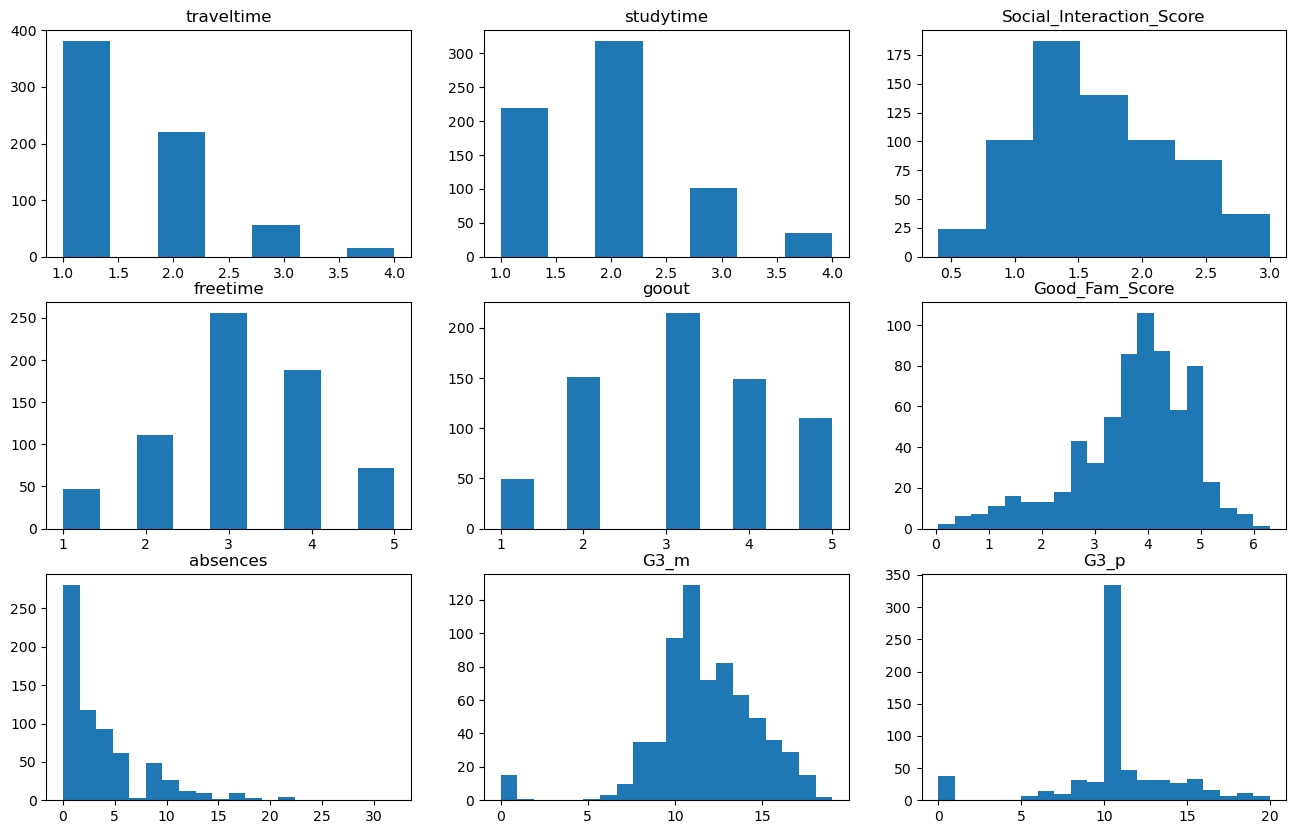

In [45]:
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
plt.hist(df['traveltime'], bins=7)
plt.title('traveltime')

plt.subplot(3,3,2)
plt.hist(df['studytime'], bins=7)
plt.title('studytime')

plt.subplot(3,3,3)
plt.hist(df['Social_Interaction_Score'], bins=7)
plt.title('Social_Interaction_Score')

plt.subplot(3,3,4)
plt.hist(df['freetime'], bins=9)
plt.title('freetime')

plt.subplot(3,3,5)
plt.hist(df['goout'], bins=10)
plt.title('goout')

plt.subplot(3,3,6)
plt.hist(df['Good_Fam_Score'], bins=20)
plt.title('Good_Fam_Score')

plt.subplot(3,3,7)
plt.hist(df['absences'], bins=20)
plt.title('absences')

plt.subplot(3,3,8)
plt.hist(df['G3_m'], bins=20)
plt.title('G3_m')

plt.subplot(3,3,9)
plt.hist(df['G3_p'], bins=20)
plt.title('G3_p')

<Axes: xlabel='reason', ylabel='G3_m'>

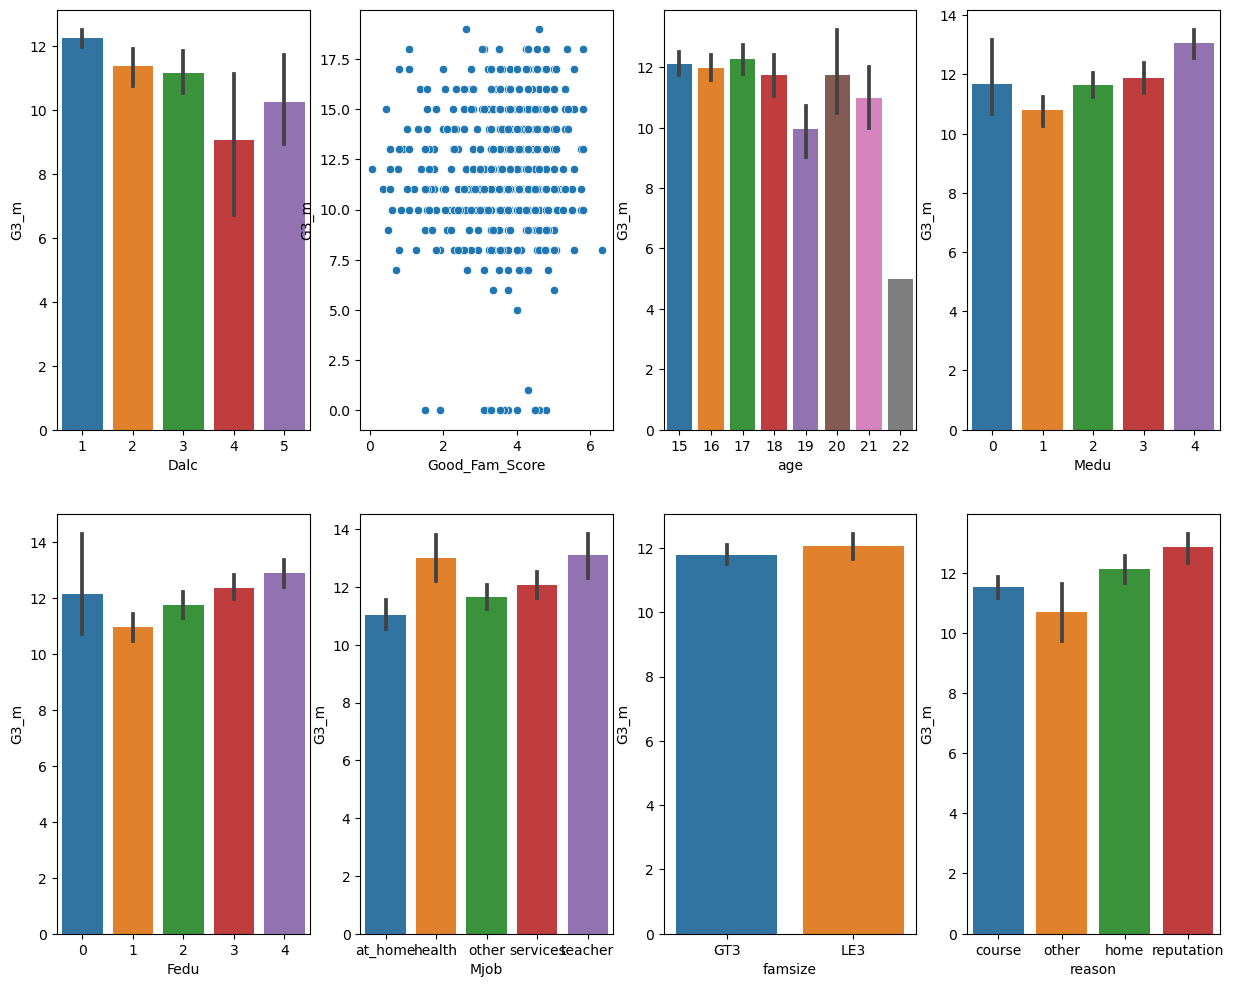

In [46]:
# Checking r

plt.figure(figsize=(15,12))

plt.subplot(2,4,1)
sns.barplot(x = 'Dalc', y = 'G3_m', data = df)

plt.subplot(2,4,2)
sns.scatterplot(x = 'Good_Fam_Score', y = 'G3_m', data = df)

plt.subplot(2,4,3)
sns.barplot(x = 'age', y = 'G3_m', data = df)

plt.subplot(2,4,4)
sns.barplot(x = 'Medu', y = 'G3_m', data = df)

plt.subplot(2,4,5)
sns.barplot(x = 'Fedu', y = 'G3_m', data = df)

plt.subplot(2,4,6)
sns.barplot(x = 'Mjob', y = 'G3_m', data = df)

plt.subplot(2,4,7)
sns.barplot(x = 'famsize', y = 'G3_m', data = df)

plt.subplot(2,4,8)
sns.barplot(x = 'reason', y = 'G3_m', data = df)

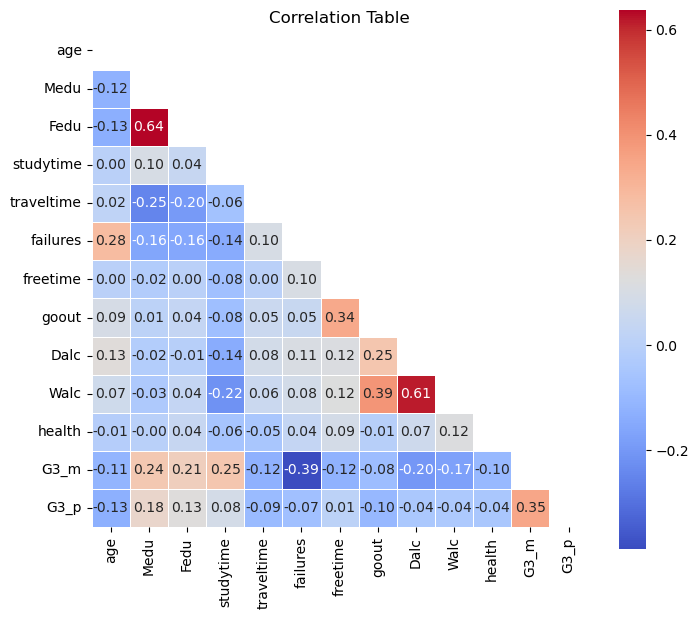

In [47]:
#Plotting Correlation Matrix
plt.figure(figsize=(8, 7))
df1 = df[['age','Medu','Fedu','studytime','paid','traveltime','failures','freetime','goout','Dalc','Walc','health','G3_m','G3_p',]]
# Create a mask for the upper half of the correlation table
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))

sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, mask = mask)
plt.title('Correlation Table')
plt.show()

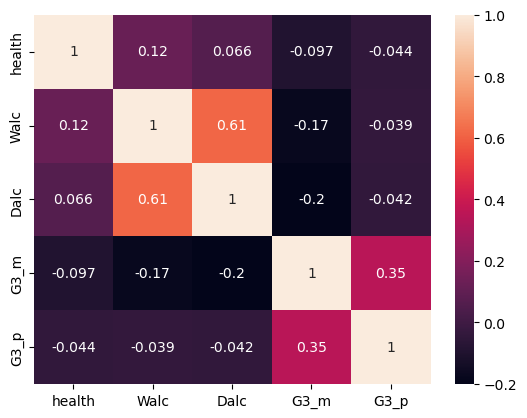

In [48]:
sns.heatmap(df[['health','Walc','Dalc','G3_m','G3_p']].corr(),annot=True)
plt.show()

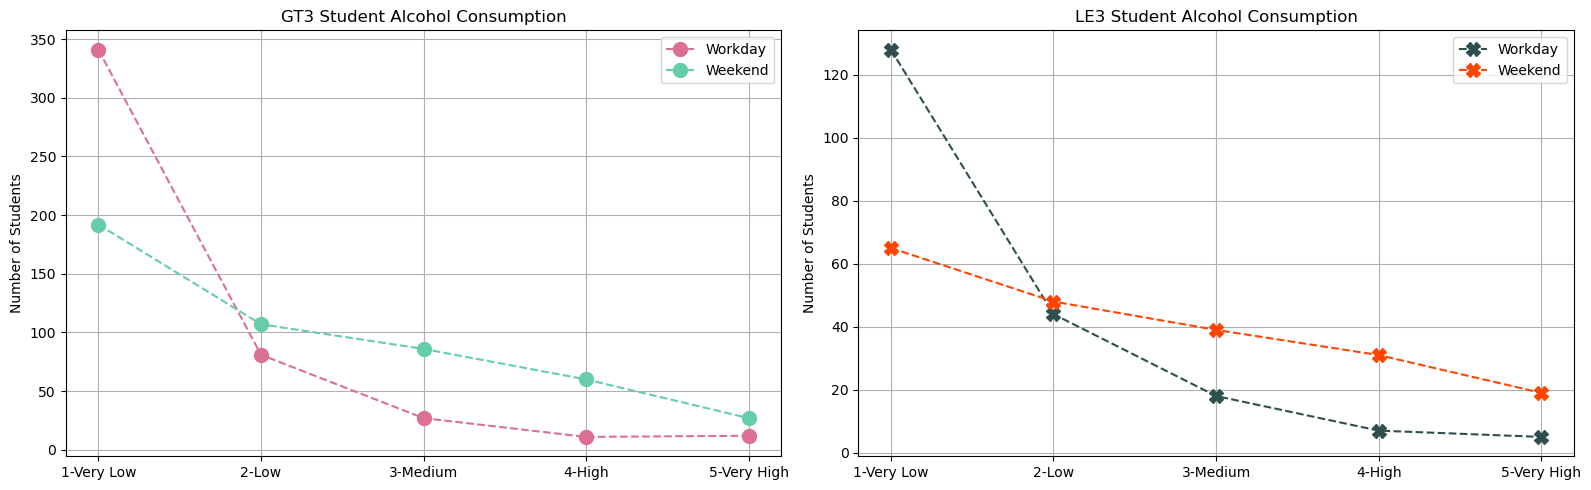

In [49]:
famsize_table=pd.concat([df.famsize,df.Dalc,df.Walc],axis=1)
GT3=famsize_table[(famsize_table.famsize=="GT3")]
LE3=famsize_table[(famsize_table.famsize=="LE3")]
l=[1,2,3,4,5] #Alcohol consumption levels from 1 - very low to 5 - very high
labels= "1-Very Low","2-Low","3-Medium","4-High","5-Very High"

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(labels,list(map(lambda l: list(GT3.Dalc).count(l),l)),color="palevioletred",linestyle="--",marker="o", markersize=10,label="Workday")
plt.plot(labels,list(map(lambda l: list(GT3.Walc).count(l),l)),color="mediumaquamarine",linestyle="--",marker="o", markersize=10,label="Weekend")
plt.title("GT3 Student Alcohol Consumption")
plt.grid()
plt.ylabel("Number of Students")
plt.legend()
plt.tight_layout()


plt.subplot(1, 2, 2)
plt.plot(labels,list(map(lambda l: list(LE3.Dalc).count(l),l)),color="darkslategrey",linestyle="--",marker="X", markersize=10,label="Workday")
plt.plot(labels,list(map(lambda l: list(LE3.Walc).count(l),l)),color="orangered",linestyle="--",marker="X", markersize=10,label="Weekend")
plt.title("LE3 Student Alcohol Consumption")
plt.grid()
plt.ylabel("Number of Students")
plt.legend()
plt.tight_layout()

<Axes: xlabel='reason', ylabel='G3_p'>

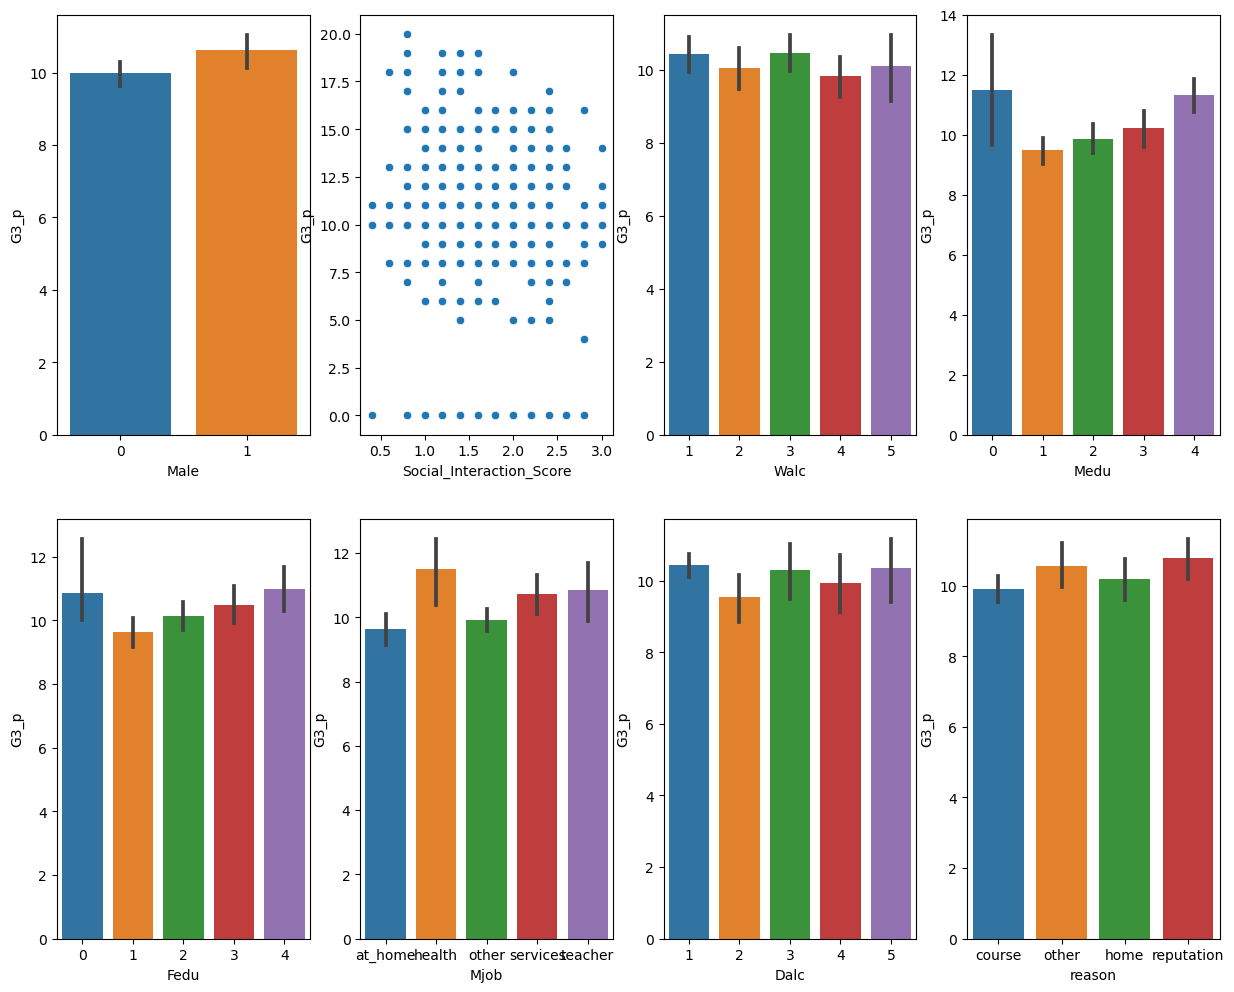

In [50]:
plt.figure(figsize=(15,12))

plt.subplot(2,4,1)
sns.barplot(x = 'Male', y = 'G3_p', data = df)

plt.subplot(2,4,2)
sns.scatterplot(x = 'Social_Interaction_Score', y = 'G3_p', data = df)

plt.subplot(2,4,3)
sns.barplot(x = 'Walc', y = 'G3_p', data = df)

plt.subplot(2,4,4)
sns.barplot(x = 'Medu', y = 'G3_p', data = df)

plt.subplot(2,4,5)
sns.barplot(x = 'Fedu', y = 'G3_p', data = df)

plt.subplot(2,4,6)
sns.barplot(x = 'Mjob', y = 'G3_p', data = df)

plt.subplot(2,4,7)
sns.barplot(x = 'Dalc', y = 'G3_p', data = df)

plt.subplot(2,4,8)
sns.barplot(x = 'reason', y = 'G3_p', data = df)

<Axes: xlabel='Good_Fam_Score', ylabel='AvgAlc'>

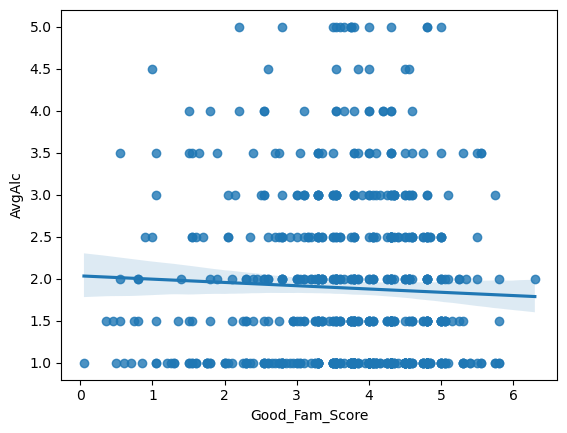

In [51]:
sns.regplot(x=df['Good_Fam_Score'], y=df['AvgAlc'])

<Axes: xlabel='Social_Interaction_Score', ylabel='AvgAlc'>

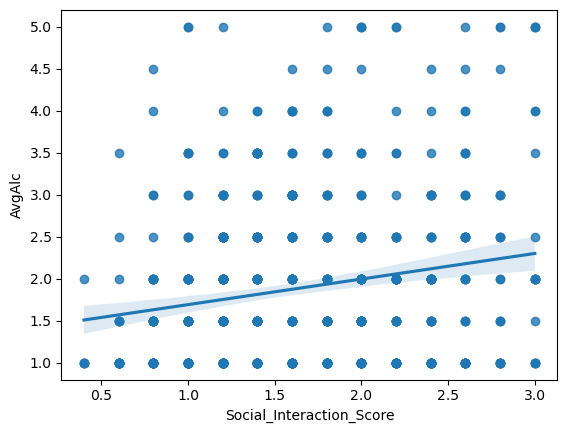

In [52]:
sns.regplot(x=df['Social_Interaction_Score'], y=df['AvgAlc'])

<Axes: xlabel='Good_Student_Score', ylabel='AvgAlc'>

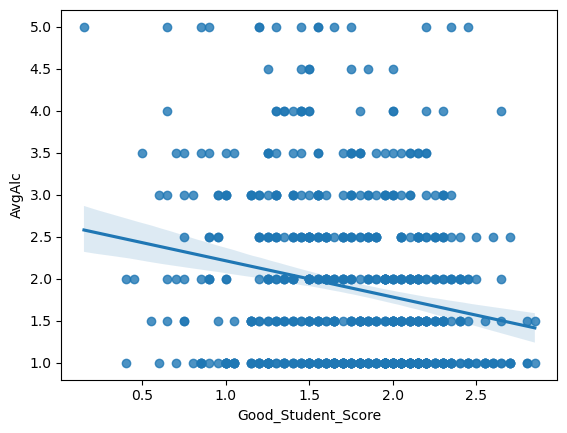

In [53]:
sns.regplot(x=df['Good_Student_Score'], y=df['AvgAlc'])

### Analysis 1 : __Good Students are more likely to be in the lower spectrum of drinking__

In [54]:
df.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3_m,G3_p,school_GP,school_MS,Female,Male,AvgAlc,MeduS,FeduS,famsizeS,FamrelS,Mjob_at_home,Fjob_at_home,Good_Fam_Score,Social_Interaction_Score,G3_mAI,G3_pAI,Finalgrade_m,Finalgrade_p,Absence_Score,Failures_Score,Good_Student_Score
0,18,U,GT3,-1,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4.0,11.0,6.0,1,0,1,0,1.0,1.00,1.00,1,0.8,1,0,3.8,1.4,0.0,0.0,0.55,0.30,-0.50,1.0,1.35
1,17,U,GT3,1,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2.0,11.0,6.0,1,0,1,0,1.0,0.25,0.25,1,1.0,1,0,4.5,1.2,0.0,0.0,0.55,0.30,-0.25,1.0,1.60
2,15,U,LE3,1,1,1,at_home,other,other,mother,1,2,0.0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6.0,12.0,10.0,1,0,1,0,2.5,0.25,0.25,0,0.8,1,0,3.3,1.0,0.0,0.0,0.60,0.50,-0.50,1.0,1.60
3,15,U,GT3,1,4,2,health,services,home,mother,1,3,0.0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0.0,14.0,15.0,1,0,1,0,1.0,1.00,0.50,1,0.6,0,0,4.1,1.8,1.0,1.0,0.70,0.75,0.00,1.0,2.45
4,16,U,GT3,1,3,3,other,other,home,father,1,2,0.0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0.0,13.0,10.0,1,0,1,0,1.5,0.75,0.75,1,0.8,0,0,4.3,1.0,1.0,0.0,0.65,0.50,0.00,1.0,2.15


In [55]:
# Creating a dataframe with all numeric columns for Machine Learning Model
data = df[['age', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3_m', 'failures',
       'absences', 'G3_p', 'school_GP', 'school_MS', 'Female', 'Male',
       'AvgAlc', 'MeduS', 'FeduS', 'famsizeS', 'FamrelS', 'Mjob_at_home',
       'Fjob_at_home', 'Good_Fam_Score', 'Social_Interaction_Score', 'G3_mAI',
       'G3_pAI', 'Finalgrade_m', 'Finalgrade_p', 'Absence_Score',
       'Failures_Score', 'Good_Student_Score']]
data.head(2)

,age,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,G3_m,failures,absences,G3_p,school_GP,school_MS,Female,Male,AvgAlc,MeduS,FeduS,famsizeS,FamrelS,Mjob_at_home,Fjob_at_home,Good_Fam_Score,Social_Interaction_Score,G3_mAI,G3_pAI,Finalgrade_m,Finalgrade_p,Absence_Score,Failures_Score,Good_Student_Score
0,18,-1,4,4,2,2,4,3,4,1,1,3,11.0,0.0,4.0,6.0,1,0,1,0,1.0,1.00,1.00,1,0.8,1,0,3.8,1.4,0.0,0.0,0.55,0.3,-0.50,1.0,1.35
1,17,1,1,1,1,2,5,3,3,1,1,3,11.0,0.0,2.0,6.0,1,0,1,0,1.0,0.25,0.25,1,1.0,1,0,4.5,1.2,0.0,0.0,0.55,0.3,-0.25,1.0,1.60


## Machine Learning (Model -1)

In [56]:
data_1 = data.copy()

In [57]:
data_1.head(1)

,age,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,G3_m,failures,absences,G3_p,school_GP,school_MS,Female,Male,AvgAlc,MeduS,FeduS,famsizeS,FamrelS,Mjob_at_home,Fjob_at_home,Good_Fam_Score,Social_Interaction_Score,G3_mAI,G3_pAI,Finalgrade_m,Finalgrade_p,Absence_Score,Failures_Score,Good_Student_Score
0,18,-1,4,4,2,2,4,3,4,1,1,3,11.0,0.0,4.0,6.0,1,0,1,0,1.0,1.0,1.0,1,0.8,1,0,3.8,1.4,0.0,0.0,0.55,0.3,-0.5,1.0,1.35


In [58]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [59]:
data_1.columns

Index(['age', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3_m', 'failures',
       'absences', 'G3_p', 'school_GP', 'school_MS', 'Female', 'Male',
       'AvgAlc', 'MeduS', 'FeduS', 'famsizeS', 'FamrelS', 'Mjob_at_home',
       'Fjob_at_home', 'Good_Fam_Score', 'Social_Interaction_Score', 'G3_mAI',
       'G3_pAI', 'Finalgrade_m', 'Finalgrade_p', 'Absence_Score',
       'Failures_Score', 'Good_Student_Score'],
      dtype='object')

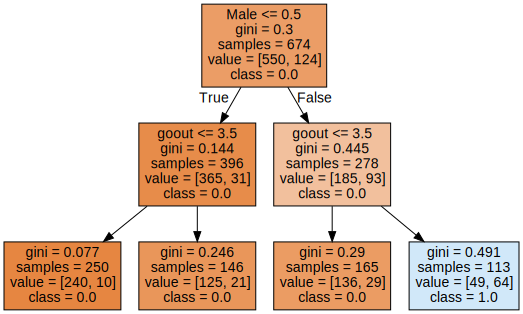

In [60]:
data_1 = data.copy()
data_1['AvgAlc'] = (data_1.AvgAlc >2.5 )+0.0 
dt = tree.DecisionTreeClassifier(max_depth=2)
X = data_1.drop(columns=['AvgAlc','Walc','Dalc'])
Y = data_1.AvgAlc
dt.fit(X,Y)
import graphviz
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
dot_data =tree.export_graphviz(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = graphviz.Source(dot_data) 
graph

## Analysis 2 : __Males are more likely to identify as heavy drinkers__


Decision tree classifier is based on the column called AvgAlc that was made binary

The value classes on the second row of the tree show our second major analysis point.  The values sections show there is a higher proportion of males who self identify as being a heavy drinker. The proportion of 93/278 = 0.33 is much higher than 31/396 = 0.07, showing that high school males identify as drinking more than their female counterparts.

## Logistic Regresion  (Model -2)

### Splitting the Data into Train and Test Dataset

### #1

In [61]:
X=data.copy()

In [62]:
X=X.drop(columns=['G3_m'],axis=1)

In [63]:
X.columns
X=sm.add_constant(X)

In [64]:
y= df['G3_m']

In [65]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [66]:
LR_train = sm.OLS(y_train,X_train).fit()
pred= LR_train.predict()

In [67]:
print(LR_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   G3_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.963e+29
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:52:06   Log-Likelihood:                 14396.
No. Observations:                 471   AIC:                        -2.874e+04
Df Residuals:                     445   BIC:                        -2.863e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [68]:
LR_test = sm.OLS(y_test,X_test).fit()
pred= LR_test.predict()
print(LR_test.summary())

                            OLS Regression Results                            
Dep. Variable:                   G3_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.330e+29
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:52:06   Log-Likelihood:                 6254.9
No. Observations:                 203   AIC:                        -1.246e+04
Df Residuals:                     177   BIC:                        -1.237e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
X=data.copy()
X=X.drop(columns=['G3_m'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,age,1.186256
1,Pstatus,inf
2,Medu,inf
3,Fedu,inf
4,traveltime,1.164186
5,studytime,1.167575
6,famrel,inf
7,freetime,1.454008
8,goout,1.631933
9,Dalc,inf


So all the variables are not making sense.. we have a very high R2 and most of the variables are not significant. So lets try buildign model only for coefficients which ar significant

Notes:
- [1] The Extremely high R-squared value in the model suggest "Overfitting".
- [2] The coefficient numbers are very small, 1.09e-03. This might indicate that there are
strong multicollinearity or other numerical problems.
So all the variables are not making sense and we have a very high R2 and most of the variables have very large value.

> Overall, it appears the model is showing signs of potential overfitting and multicollinearity issues. Further analysis involve assessing variable significance, checking for multicollinearity, and using specific variables to mitigate overfitting.

>  - <u>__Insight__</u>: Both 'Dalc' and 'Walc' coefficients are extremely close to zero, implying that in the model, they don't significantly contribute to the prediction of the final grade (G3_m).
 > - <u>__Negligible Influence__</u>: According to this particular regression, weekday and weekend alcohol consumption seem to have minimal effect, if any, on the final grades.
 > -  <u>__Consideration__</u>: It's important to note that these coefficients might suggest a lack of significant linear relationship within this specific model. It doesn't necessarily mean there's no impact; other factors or nonlinear relationships might be at play.


### #2 (with Significant Variables)

In [70]:
X=data[['health','Absence_Score','Good_Student_Score','traveltime','absences','G3_mAI',
        'G3_pAI','AvgAlc','Pstatus','Social_Interaction_Score','age','studytime','goout']]
X=sm.add_constant(X)

In [71]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [72]:
y=data['G3_m']

In [73]:
LR_train = sm.OLS(y_train,X_train).fit()
pred= LR_train.predict()
print(LR_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   G3_m   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     112.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.62e-133
Time:                        14:52:07   Log-Likelihood:                -854.05
No. Observations:                 471   AIC:                             1736.
Df Residuals:                     457   BIC:                             1794.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [74]:
LR_test = sm.OLS(y_test,X_test).fit()
pred= LR_test.predict()
print(LR_test.summary())

                            OLS Regression Results                            
Dep. Variable:                   G3_m   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     49.60
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           9.26e-54
Time:                        14:52:07   Log-Likelihood:                -388.57
No. Observations:                 203   AIC:                             805.1
Df Residuals:                     189   BIC:                             851.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- "Absence_Score" and "Good_Student_Score" seem to have significant impacts on the predicted variable.
- R^2 of the model is 0.595 meaning approximately 59.5% of the variability in the target variable is accounted for by the predictors. 
- P-values: Several variables have p-values higher than 0.05, suggesting they might not significantly influence the outcome. These assess the significance of each coefficient estimate. A low p-value (typically < 0.05) suggests that the predictor variable is statistically significant.


In [75]:
# Checking for multicolinearity
X = data[['health','Absence_Score','Good_Student_Score','traveltime','absences','G3_mAI',
        'G3_pAI','AvgAlc','Pstatus','Social_Interaction_Score','age','studytime','goout']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,health,7.079231
1,Absence_Score,9.548278
2,Good_Student_Score,39.612500
3,traveltime,5.510702
4,absences,6.266835
5,G3_mAI,2.722635
6,G3_pAI,1.775496
7,AvgAlc,5.919102
8,Pstatus,2.355857
9,Social_Interaction_Score,11.658405


The VIF values measure multicollinearity among the predictor variables. VIF values above 7 or 10 are generally considered indicative of high multicollinearity.
In this case, Social_Interaction_Score, goout, age and studytime and health exhibit moderate-to-high multicollinearity.

### #3 ( After removing 'Social_Interaction_Score', 'goout',' studytime','age' and 'health','good_student_score')

In [76]:
X=data[['Absence_Score','Good_Student_Score','traveltime','absences','G3_mAI',
        'G3_pAI','AvgAlc','Pstatus']]
X=sm.add_constant(X)

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

y=data['G3_m']

LR_train = sm.OLS(y_train,X_train).fit()
pred= LR_train.predict()
print(LR_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   G3_m   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     176.4
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          3.47e-135
Time:                        14:52:07   Log-Likelihood:                -863.06
No. Observations:                 471   AIC:                             1744.
Df Residuals:                     462   BIC:                             1782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2802      0

In [77]:
LR_test = sm.OLS(y_test,X_test).fit()
pred= LR_test.predict()
print(LR_test.summary())

                            OLS Regression Results                            
Dep. Variable:                   G3_m   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     80.76
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.34e-57
Time:                        14:52:07   Log-Likelihood:                -390.45
No. Observations:                 203   AIC:                             798.9
Df Residuals:                     194   BIC:                             828.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4033      0

In [78]:
X = data[['health','Absence_Score','Good_Student_Score','traveltime','absences','G3_mAI',
        'G3_pAI','AvgAlc','Pstatus']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,health,6.660338
1,Absence_Score,7.991794
2,Good_Student_Score,13.686597
3,traveltime,5.180535
4,absences,6.181662
5,G3_mAI,2.571172
6,G3_pAI,1.592644
7,AvgAlc,4.883139
8,Pstatus,2.318416


### Analysis 3: __There is no relationship between Alcohol consumption and Final Grades of the student__

Both Daily alc consumption and Weekly alc consumption are extremely close to 0 indicating that they have minimal effects on the prediction of marks of a student. 

__IMPORTANT__: These coefficient suggests a lack of relationship between daily/weekly consumption and student marks but it doesn’t necessarily means that there is no impact of alcohol consumption on a student’s final marks, other qualitative factor might be at play here.


<Axes: >

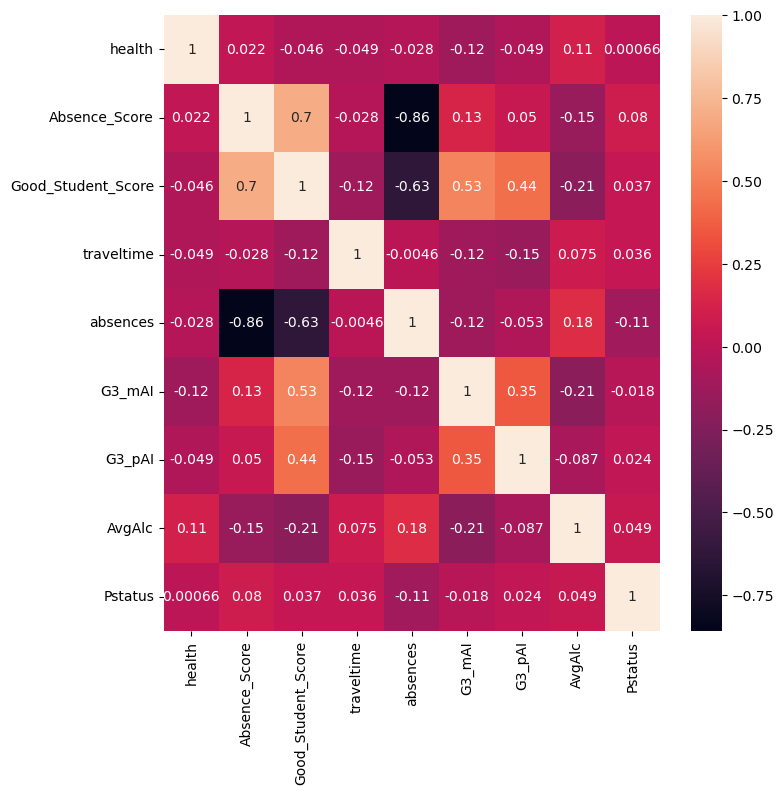

In [79]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True)

## Desicion Tree Analysis  (Try -3)

In [80]:
data_3 = data.copy()
binary_convertible_dict = {
    'school': {'GP': 1, 'MS': 0},
    'sex': {'F': 1, 'M': 0},
    'address': {'U': 1, 'R': 0},
    'famsize': {'LE3': 1, 'GT3': 0},
    'Pstatus': {'T': 1, 'A': 0},
    'schoolsup': {'yes': 1, 'no': 0},
    'famsup': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0},
    'activities': {'yes': 1, 'no': 0},
    'nursery': {'yes': 1, 'no': 0},
    'higher': {'yes': 1, 'no': 0},
    'internet': {'yes': 1, 'no': 0},
    'romantic': {'yes': 1, 'no': 0},
    'Mjob': {'teacher': 0, 'health': 0, 'civil services': 0, 'at_home': 1, 'other': 0, 'services': 0},
    'Fjob': {'teacher': 0, 'health': 0, 'civil services': 0, 'at_home': 1, 'other': 0, 'services': 0 },
    'reason': {'close to home': 0, 'school reputation': 0, 'course preference': 0, 'other': 1},
    'guardian': {'mother': 0, 'father': 0, 'other': 1}
}

data.replace(binary_convertible_dict, inplace=True)

In [81]:
data_3.columns

Index(['age', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3_m', 'failures',
       'absences', 'G3_p', 'school_GP', 'school_MS', 'Female', 'Male',
       'AvgAlc', 'MeduS', 'FeduS', 'famsizeS', 'FamrelS', 'Mjob_at_home',
       'Fjob_at_home', 'Good_Fam_Score', 'Social_Interaction_Score', 'G3_mAI',
       'G3_pAI', 'Finalgrade_m', 'Finalgrade_p', 'Absence_Score',
       'Failures_Score', 'Good_Student_Score'],
      dtype='object')

In [82]:
def categorize_alcohol_consumption(x):
    if x < 3:
        return '0'
    else:
        return '1'

# Apply the function to the Alcohol_Overall column
data_3['Alcohol_Overall_Cat'] = data_3['AvgAlc'].apply(categorize_alcohol_consumption)

In [83]:
X = data_3[['Good_Fam_Score','Social_Interaction_Score','Good_Student_Score']]
Y= data_3.Alcohol_Overall_Cat

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
train_test_split(X,Y,test_size=0.3,random_state = 0)

[     Good_Fam_Score  Social_Interaction_Score  Good_Student_Score
 325            1.05                       2.8                1.15
 405            1.65                       1.0                1.05
 424            3.80                       1.6                2.10
 584            3.80                       1.4                2.05
 298            2.60                       2.0                1.35
 ..              ...                       ...                 ...
 9              4.75                       1.2                2.40
 359            5.55                       1.4                2.10
 192            4.30                       2.2                1.25
 629            3.35                       2.0                1.20
 559            5.05                       1.0                1.90
 
 [471 rows x 3 columns],
      Good_Fam_Score  Social_Interaction_Score  Good_Student_Score
 316            5.30                       2.2                1.80
 31             4.80               

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [87]:
X_train.head()

,Good_Fam_Score,Social_Interaction_Score,Good_Student_Score
325,1.05,2.8,1.15
405,1.65,1.0,1.05
424,3.80,1.6,2.10
584,3.80,1.4,2.05
298,2.60,2.0,1.35


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

### predict on the test set

In [90]:
cl.predict(X_test)

array(['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

Accuracy ..

In [91]:
(cl.predict(X_test) == Y_test).mean()

0.812807881773399

In [92]:
y_pred = cl.predict(X_test)

In [93]:
y_pred

array(['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

Every classifier will also give a prediction output with probability

In [94]:
cl.predict_proba(X_test)

array([[0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.49      , 0.51      ],
       [0.61      , 0.39      ],
       [0.94      , 0.06      ],
       [0.87      , 0.13      ],
       [0.66      , 0.34      ],
       [0.99      , 0.01      ],
       [0.621     , 0.379     ],
       [0.99      , 0.01      ],
       [0.72      , 0.28      ],
       [0.96      , 0.04      ],
       [0.86      , 0.14      ],
       [0.96      , 0.04      ],
       [0.76      , 0.24      ],
       [0.9       , 0.1       ],
       [0.99      , 0.01      ],
       [0.63      , 0.37      ],
       [0.99      , 0.01      ],
       [0.84      , 0.16      ],
       [0.95      , 0.05      ],
       [0.54      , 0.46      ],
       [0.99      , 0.01      ],
       [0.99      , 0.01      ],
       [0.97      , 0.03      ],
       [0.97      , 0.03      ],
       [0.95      , 0.05      ],
       [0.85      , 0.15      ],
       [0.95      , 0.05      ],
       [0.96      , 0.04      ],
       [0.

In [95]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [96]:
y_pred_proba

array([0.2       , 0.        , 0.51      , 0.39      , 0.06      ,
       0.13      , 0.34      , 0.01      , 0.379     , 0.01      ,
       0.28      , 0.04      , 0.14      , 0.04      , 0.24      ,
       0.1       , 0.01      , 0.37      , 0.01      , 0.16      ,
       0.05      , 0.46      , 0.01      , 0.01      , 0.03      ,
       0.03      , 0.05      , 0.15      , 0.05      , 0.04      ,
       0.3       , 0.19      , 0.18      , 0.07      , 0.        ,
       0.52      , 0.08      , 0.14      , 0.24      , 0.2       ,
       0.3       , 0.39      , 0.52      , 0.66766667, 0.45      ,
       0.04      , 0.07      , 0.3       , 0.41      , 0.33      ,
       0.18      , 0.07      , 0.09      , 0.42      , 0.01      ,
       0.28      , 0.        , 0.04      , 0.1       , 0.16      ,
       0.15      , 0.59      , 0.03      , 0.14      , 0.19      ,
       0.04      , 0.21      , 0.        , 0.23      , 0.09      ,
       0.23      , 0.03      , 0.44      , 0.03      , 0.41   

### collect scores

#### Confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
import sklearn.metrics as met

In [99]:
confusion_matrix(Y_test,y_pred)

array([[162,   7],
       [ 31,   3]])

#### Accuracy

In [100]:
(y_pred == Y_test).mean()

0.812807881773399

In [101]:
met.accuracy_score(Y_test, y_pred)

0.812807881773399

#### Precision, (out of the retrieved elements, how many are actually positive?)

In [102]:
met.precision_score(Y_test,y_pred, average = 'micro')

0.812807881773399

#### Recall, (Among the relevant elements, how many did I retrieve?)

In [103]:
met.recall_score(Y_test,y_pred, average = 'micro')

0.812807881773399

This machine learning module takes the data take into account the different classification and create a module to predict the average alcohol consumption
My current module has an accuracy of 54%.

#### AUC score

In [104]:
met.roc_auc_score(Y_test,y_pred_proba)

0.5475983292725374

__Limitations__:

- one thing we want to fix for our final submission is optimizing our data cleaning. We plan on changing our fillna from filling with zeroes to filling with the column averages, in order to limit data skewing.

__Summary__:
- Males are more likely to drink
- drinking does not affect final scores
- but, it affects iverall school performance.

So, we reccomend that school's and families discourage underage drinking to promote attendance and overall school success.

__Managerial Insights__: 

Concerned High School administration should take away some key insights from our analyses:
- 1) For reducing alcohol abuse in students, propaganda / ads should focus on sober benefits such as reducing attendance rather than student grades.
- 2) Since the incidence of high school boys perceiving themselves as being heavy drinkers is 4x more than their female counterparts, marketing for anti-alcohol abuse programs should be male-centric and be displayed in male spaces. This could mean more male bathroom flyers, or coaches talking with male sports teams at school.

Team Members:


- __Shivanshi Tiwari__
- __Domnick Kubica__
- __Dylan Gordon__
- __Cole Novara__
- __Mike Quach__